In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Top 10 Words

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Banco Carrefour/datasets/resultado_part-00000.txt",sep=",", header=None, names=["WORD", "COUNT"])

In [187]:
df.head(10)

,WORD,COUNT
0,('the',4066)
1,('and',2969)
2,('of',2746)
3,('I',2719)
4,('to',2144)
5,('my',1631)
6,('a',1394)
7,('',1186)
8,('in',1129)
9,('was',994)


In [188]:
df.shape

(12110, 2)

> Removing all the special characters

In [189]:
df = df.replace(r"[^0-9a-zA-Z ]", '', regex=True).replace("'", '')

In [199]:
df.at[7,"WORD"] = '"'

In [191]:
df.head(5)

,WORD,COUNT
0,the,4066
1,and,2969
2,of,2746
3,I,2719
4,to,2144


> Changing the COUNT column to int type

In [192]:
df["COUNT"] = pd.to_numeric(df["COUNT"], downcast="integer", errors='coerce')

In [193]:
df.dtypes

WORD      object
COUNT    float64
dtype: object

> Caching the 10 words with the largest numbers in count column

In [201]:
top_ten = df.nlargest(10, ['COUNT'])

In [202]:
top_ten

,WORD,COUNT
0,the,4066.0
1,and,2969.0
2,of,2746.0
3,I,2719.0
4,to,2144.0
5,my,1631.0
6,a,1394.0
7,"""",1186.0
8,in,1129.0
9,was,994.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

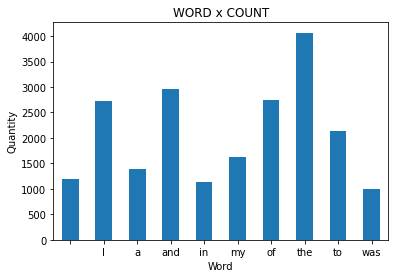

In [196]:
top_ten.groupby("WORD")["COUNT"].sum().plot.bar(title="WORD x COUNT")
plt.xlabel("Word")
plt.ylabel("Quantity")
plt.xticks(rotation='horizontal')

In [206]:
df.to_csv("words_df.csv", index=False)

In [205]:
top_ten.to_csv("resultado.txt", index=False)